In [1]:
from datetime import date
from pyspark.sql import SparkSession, DataFrame

import constants
from scripts import games, developers, genres, developers, predictions, platforms, publisher

from utils.spark_utils import SparkUtils
import pandas as pd

pd.set_option('display.max_rows', None)  # Показывать все строки
pd.set_option('display.max_columns', None)  # Показывать все столбцы
pd.set_option('display.max_colwidth', None)  # Полная ширина столбцов
pd.set_option('display.width', None)  # Полная ширина вывода


spark_session: SparkSession = SparkUtils.get_spark_session(app_name="app")
df: DataFrame = spark_session.read.csv(
    path=constants.DATASET_FULLPATH,
    sep=",",
    header=True,
    schema=SparkUtils.DATASET_STRUCT,
).drop("img")

df.show(50)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/26 10:33:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+--------------------+-------+----------------+--------------------+--------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|               title|console|           genre|           publisher|           developer|critic_score|total_sales|na_sales|jp_sales|pal_sales|other_sales|release_date|last_update|
+--------------------+-------+----------------+--------------------+--------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|  Grand Theft Auto V|    PS3|          Action|      Rockstar Games|      Rockstar North|         9.4|      20.32|    6.37|    0.99|     9.85|       3.12|  2013-09-17|       NULL|
|  Grand Theft Auto V|    PS4|          Action|      Rockstar Games|      Rockstar North|         9.7|      19.39|    6.06|     0.6|     9.71|       3.02|  2014-11-18| 2018-01-03|
|Grand Theft Auto:...|    PS2|          Action|      Rockstar Games|      Rockstar North|         9.

+-----------------------------------+----+--------------------+
|publisher                          |year|released_title_count|
+-----------------------------------+----+--------------------+
|honeybee                           |2015|1                   |
|Team17 Software                    |2015|14                  |
|Arc System Works                   |2015|10                  |
|Atlus                              |2015|18                  |
|MidBoss                            |2015|3                   |
|Next Dimension Game Adventures Ltd.|2015|1                   |
|Koei Tecmo                         |2015|4                   |
|Avalanche Studios                  |2015|1                   |
|The Behemoth                       |2015|1                   |
|Shin'en                            |2015|1                   |
|505 Games                          |2015|5                   |
|Nnooo                              |2015|3                   |
|Nicalis                            |201

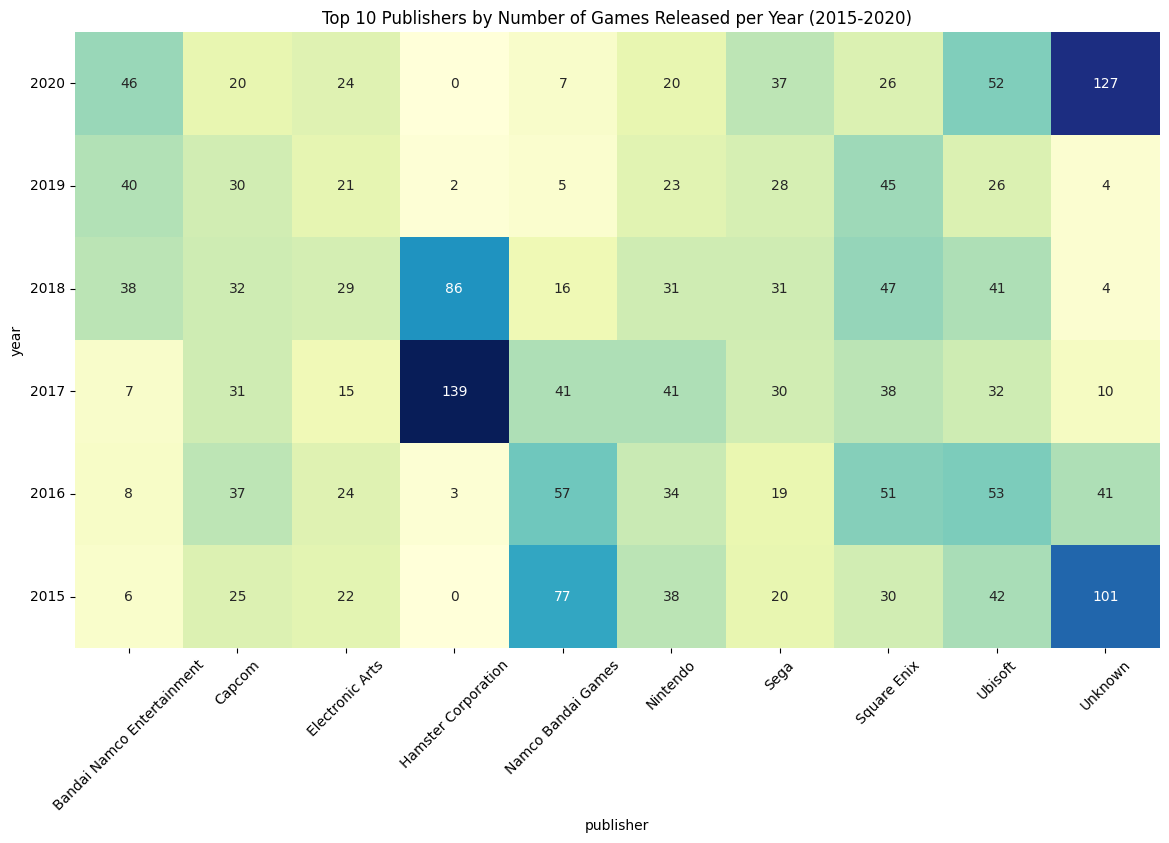

DataFrame[publisher: string, year: int, released_title_count: bigint]

In [2]:
# кол-во выпущенных игр на каждый год для топ n издателей
publisher.count_of_games_by_year_from_publisher(df, 2015, 2020)

+--------------------+-----------+------------+
|               title|other_sales|release_date|
+--------------------+-----------+------------+
|  Grand Theft Auto V|       8.32|  2013-09-17|
|Call of Duty: Bla...|       3.67|  2012-11-13|
|Call of Duty: Ghosts|       3.65|  2013-11-05|
|Call of Duty: Bla...|       3.63|  2015-11-06|
|      FIFA Soccer 08|       3.53|  2007-10-09|
|Pro Evolution Soc...|       3.51|  2008-03-11|
|Call of Duty: Bla...|       3.31|  2010-11-09|
|Call of Duty: Mod...|       3.26|  2011-11-08|
|           Minecraft|       2.96|  2014-10-07|
|Call of Duty: Mod...|       2.95|  2009-11-10|
|      FIFA Soccer 09|       2.86|  2008-10-14|
|Call of Duty: Adv...|       2.81|  2014-11-04|
|Red Dead Redempti...|        2.8|  2018-10-26|
| Grand Theft Auto IV|       2.72|  2008-04-29|
|  Call of Duty: WWII|        2.7|  2017-11-03|
|Guitar Hero III: ...|       2.64|  2007-10-28|
|PES 2009: Pro Evo...|       2.62|  2008-11-11|
|Need for Speed: P...|       2.57|  2007

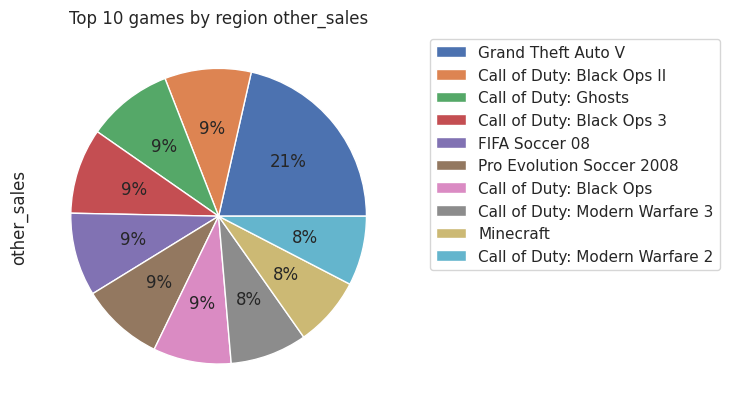

DataFrame[title: string, other_sales: double, release_date: date]

In [16]:
# диаграмма популярных игр (определяется по продажам) в определенном регионе
games.get_popular_games_by_region(df, "other_sales", 10)

+----------------+-----------+
|genre           |other_sales|
+----------------+-----------+
|Sports          |128.19     |
|Action          |112.41     |
|Shooter         |108.43     |
|Misc            |58.52      |
|Racing          |56.44      |
|Role-Playing    |33.75      |
|Platform        |30.38      |
|Adventure       |30.11      |
|Fighting        |28.65      |
|Simulation      |24.34      |
|Action-Adventure|18.4       |
|Puzzle          |7.38       |
|Strategy        |7.29       |
|Music           |4.93       |
|MMO             |1.03       |
|Party           |0.52       |
|Visual Novel    |0.13       |
|Sandbox         |0.12       |
|Education       |0.08       |
|Board Game      |0.02       |
+----------------+-----------+



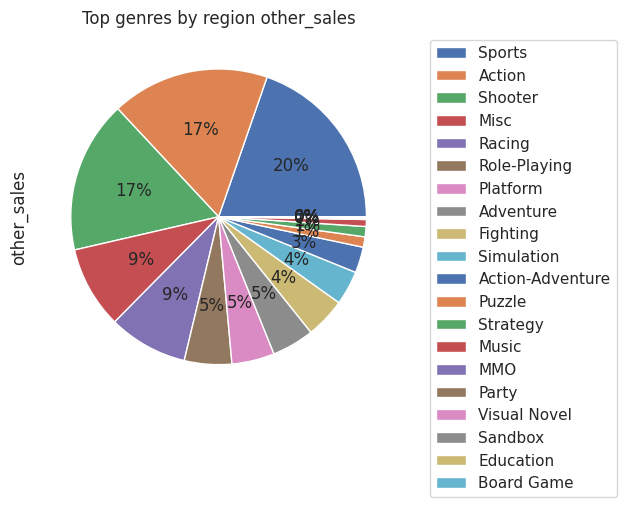

DataFrame[genre: string, other_sales: double]

In [20]:
# диаграмма популярных жанров в определенном регионе
genres.get_popular_genres_by_region(df, "other_sales")

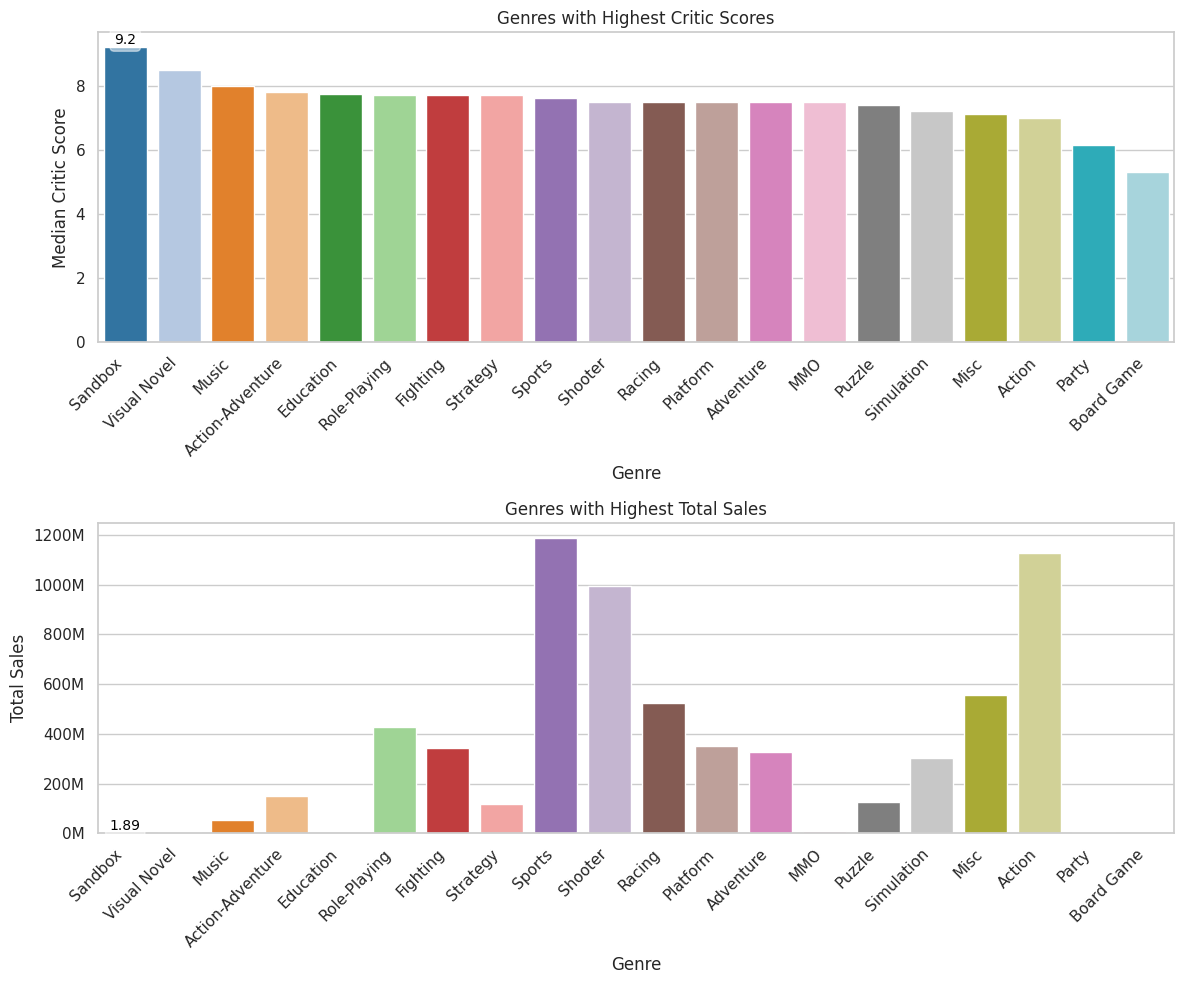

In [26]:
# Топ жанров по оценкам критиков и продажам
genres.get_top_genres_by_critic_score_and_sales(df)

Correlation between critic_score and na_sales: 0.3603082987235861
Correlation between critic_score and jp_sales: 0.14743267236534344
Correlation between critic_score and pal_sales: 0.3152068070313734
Correlation between critic_score and other_sales: 0.3206361999344065
Correlation between critic_score and total_sales: 0.3696868028666367


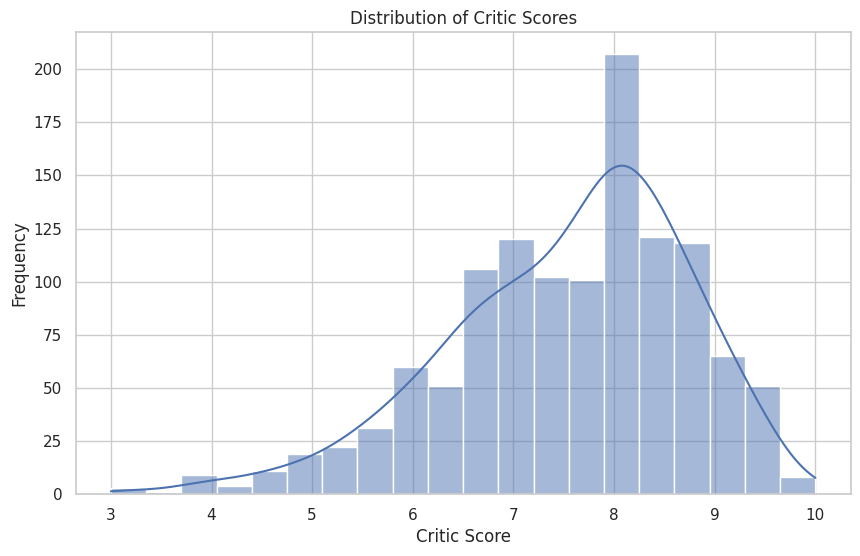

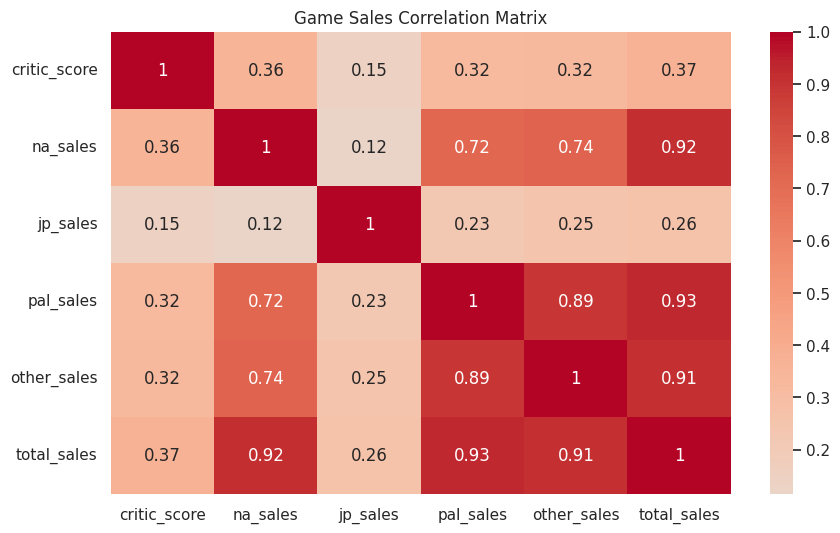

In [6]:
# распределение продаж игр по оценкам критиков и тепловая карта корреляции между продажами
# игр в различных регионах и оценками критиков
games.game_sale_estimates(df)

+-------+-----------+
|console|other_sales|
+-------+-----------+
|PS4    |28.48      |
|XOne   |1.59       |
|NS     |1.37       |
|3DS    |0.77       |
|PS3    |0.46       |
|WiiU   |0.38       |
+-------+-----------+



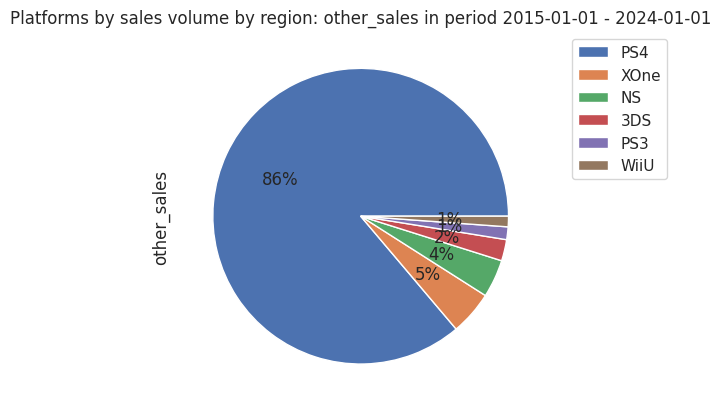

DataFrame[console: string, other_sales: double]

In [24]:
# диаграмма популярных игровых платформ в определенном регионе и промежутке времени
platforms.get_popular_platforms_by_region(df, "other_sales", date(2015, 1, 1), date(2024, 1, 1))

+--------------------------------------------+------------------+-------------------+------------------+-------------------+
|title                                       |na_sales          |jp_sales           |pal_sales         |other_sales        |
+--------------------------------------------+------------------+-------------------+------------------+-------------------+
|Grand Theft Auto: Vice City                 |8.40999984741211  |0.4699999988079071 |5.489999771118164 |1.7799999713897705 |
|Grand Theft Auto                            |0.7900000214576721|0.03999999910593033|1.350000023841858 |0.14000000059604645|
|Grand Theft Auto V                          |26.19000005722046 |1.6600000318139791 |28.140000343322754|8.319999814033508  |
|Grand Theft Auto: Liberty City Stories      |4.460000038146973 |0.3099999949336052 |4.229999899864197 |2.240000009536743  |
|Grand Theft Auto: Vice City Stories         |2.4800000190734863|0.18999999575316906|2.0599999707192183|1.3200000524520874 |


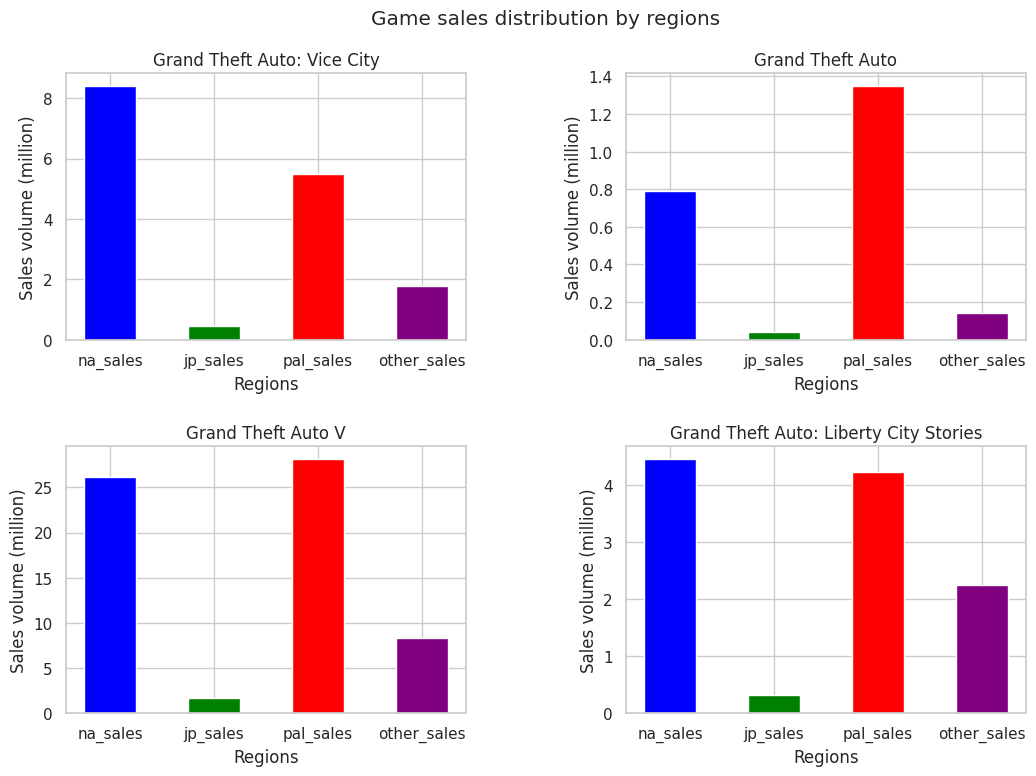

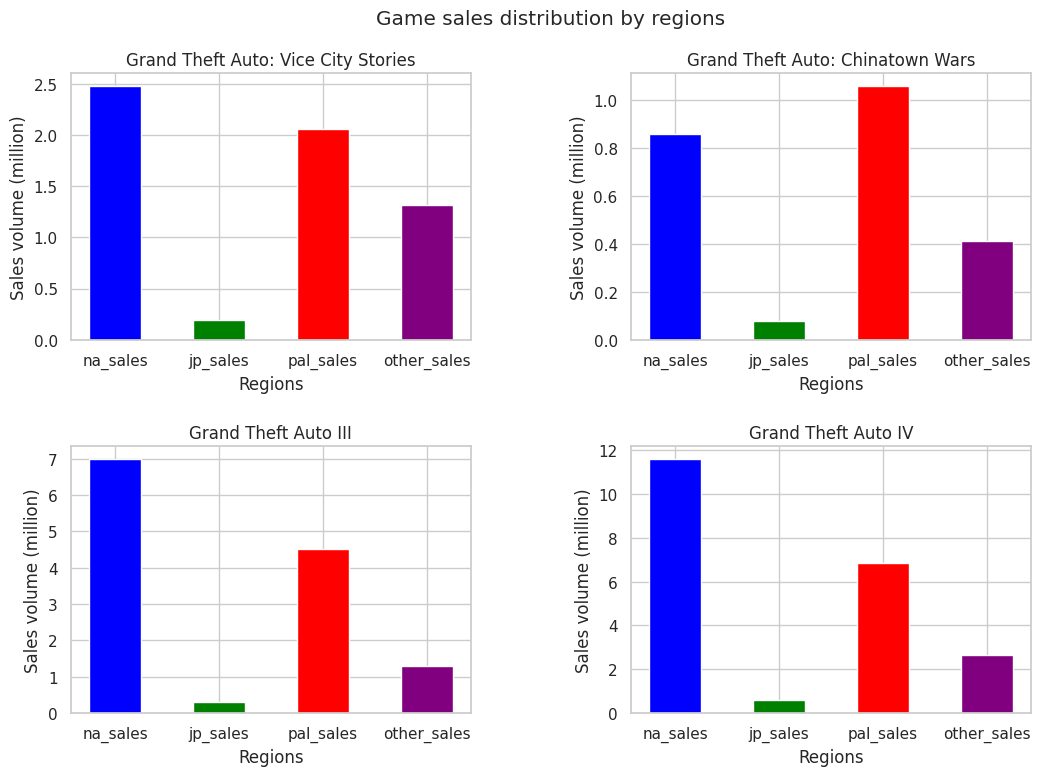

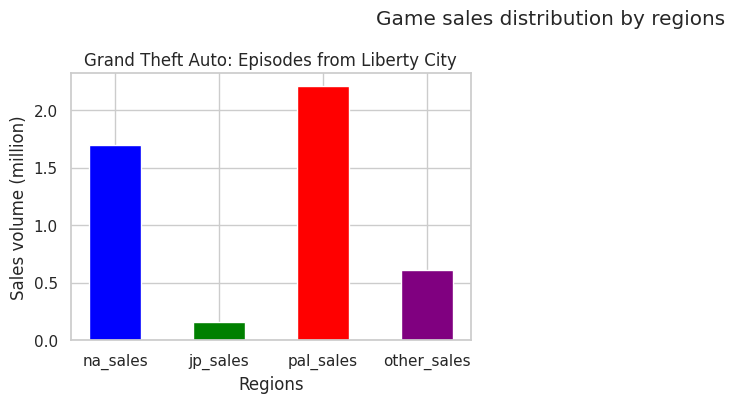

DataFrame[title: string, na_sales: double, jp_sales: double, pal_sales: double, other_sales: double]

In [8]:
games.get_game_sales_by_region(df, "grand theft auto")

In [9]:
predictions.predict_next_game_performance(spark_session, df, "Call of Duty", "PS4")

+---------------------------------------+-------+-------+----------+------------------+------------+-----------+--------+--------+---------+-----------+------------+--------------------+
|title                                  |console|genre  |publisher |developer         |critic_score|total_sales|na_sales|jp_sales|pal_sales|other_sales|release_date|release_date_numeric|
+---------------------------------------+-------+-------+----------+------------------+------------+-----------+--------+--------+---------+-----------+------------+--------------------+
|Call of Duty: Ghosts                   |PS4    |Shooter|Activision|Infinity Ward     |7.5         |4.17       |1.79    |0.05    |1.64     |0.69       |2013-11-15  |1384459200          |
|Call of Duty: Advanced Warfare         |PS4    |Shooter|Activision|Sledgehammer Games|8.5         |7.53       |2.84    |0.14    |3.34     |1.22       |2014-11-04  |1415048400          |
|Call of Duty: Black Ops 3              |PS4    |Shooter|Activisi

24/06/25 14:53:44 WARN Instrumentation: [815b6530] regParam is zero, which might cause numerical instability and overfitting.
24/06/25 14:53:44 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/06/25 14:53:44 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
24/06/25 14:53:44 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


evaluator: RegressionEvaluator_3abaf1653470
Root Mean Squared Error (RMSE) on test data for critic_score: 0.7799529151985798


24/06/25 14:53:45 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
24/06/25 14:53:46 WARN Instrumentation: [e8663cca] regParam is zero, which might cause numerical instability and overfitting.


evaluator: RegressionEvaluator_490d94d5752c
Root Mean Squared Error (RMSE) on test data for total_sales: 0.05225578152414201


24/06/25 14:53:48 WARN Instrumentation: [83de039d] regParam is zero, which might cause numerical instability and overfitting.


evaluator: RegressionEvaluator_d90e27c3fff2
Root Mean Squared Error (RMSE) on test data for na_sales: 0.23842964113094212


24/06/25 14:53:49 WARN Instrumentation: [b8ea0048] regParam is zero, which might cause numerical instability and overfitting.


evaluator: RegressionEvaluator_08b747706453
Root Mean Squared Error (RMSE) on test data for jp_sales: 0.020951861527751303
Predicted Critic Score: 8.188381197897861
Predicted Total Sales: 9.732203855683515
Predicted NA Sales: 3.353180125271063
Predicted JP Sales: 0.30421652378724073


In [10]:
predictions.predict_next_game_performance_random_tree(spark_session, df, "Call of Duty", "PS4")

+---------------------------------------+-------+-------+----------+------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|title                                  |console|genre  |publisher |developer         |critic_score|total_sales|na_sales|jp_sales|pal_sales|other_sales|release_date|last_update|
+---------------------------------------+-------+-------+----------+------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|Call of Duty: Black Ops 3              |PS4    |Shooter|Activision|Treyarch          |8.1         |15.09      |6.18    |0.41    |6.05     |2.44       |2015-11-06  |2018-01-14 |
|Call of Duty: WWII                     |PS4    |Shooter|Activision|Sledgehammer Games|8.1         |13.4       |4.67    |0.4     |6.21     |2.12       |2017-11-03  |2017-12-31 |
|Call of Duty: Infinite Warfare         |PS4    |Shooter|Activision|Infinity Ward     |7.9         |8.48      

24/06/25 14:53:51 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 5 (= number of training instances)


R^2 for critic_score: -inf
Training model for total_sales...


24/06/25 14:53:53 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 5 (= number of training instances)


R^2 for total_sales: -inf
Training model for na_sales...


24/06/25 14:53:55 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 5 (= number of training instances)


R^2 for na_sales: -inf
Training model for jp_sales...


24/06/25 14:53:56 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 5 (= number of training instances)


R^2 for jp_sales: -inf
Predicted values for the next game in the series:
critic_score: 8.212000074386596
total_sales: 6.657399983406067
na_sales: 2.427599937617779
jp_sales: 0.1527999997884035


                  developer  total_sales  critic_score
0                 EA Canada   275.560000      7.817094
1                EA Tiburon   178.329999      7.832979
2          Ubisoft Montreal   172.960000      7.433981
3                  Treyarch   150.190000      7.831915
4         Traveller's Tales   149.549999      7.129231
5             Infinity Ward   118.969999      8.092308
6            Rockstar North   116.909998      9.060869
7                    Konami   109.540001      6.949462
8           Visual Concepts    97.610000      7.758065
9                    Capcom    93.020000      7.743046
10                    Namco    73.280000      8.009302
11        Vicarious Visions    65.990000      7.088372
12                  Ubisoft    62.400000      6.624074
13             EA Black Box    57.200000      7.468182
14  Neversoft Entertainment    56.300000      7.974286
15                  EA DICE    55.780000      8.315385
16        EA Redwood Shores    54.900000      7.696296
17        

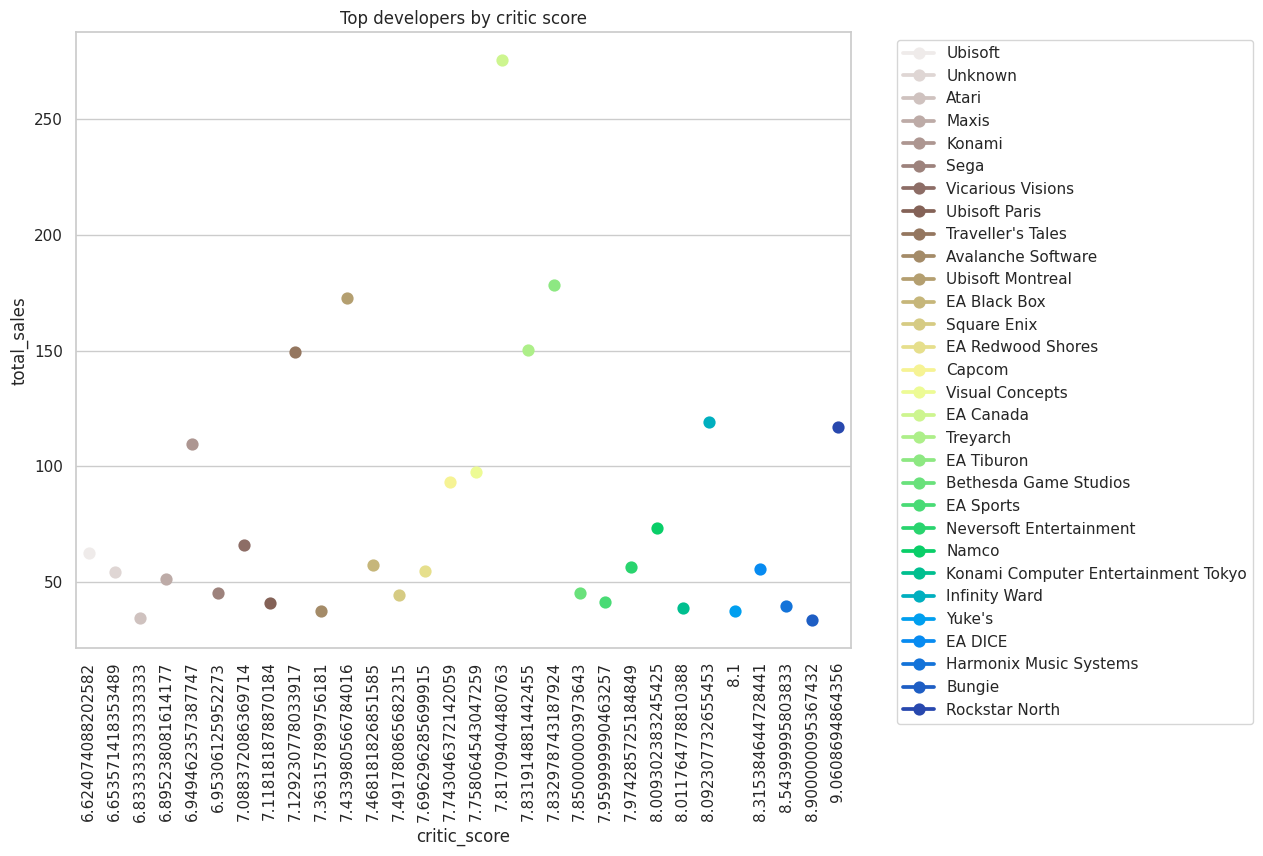

In [25]:
developers.get_top_developers_by_critic_score(df)

24/06/26 10:34:08 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


+--------------------+------------------+-----+------------------+
|           publisher|       total_sales|title|      critic_score|
+--------------------+------------------+-----+------------------+
|          Activision| 722.7699973676354| 1582| 7.081842840525516|
|     Electronic Arts| 644.1299985796213| 1619| 7.395680345675343|
|           EA Sports|485.66000073589385|  804| 7.825688095267759|
|             Ubisoft| 462.5699989236891| 1663| 6.982031251614292|
|                 THQ| 320.8899994492531| 1111| 6.925726169372496|
|Sony Computer Ent...| 311.0799998641014| 1372|7.6188356300739395|
|      Rockstar Games| 239.6699985936284|  180| 8.511428601401192|
|              Konami|210.69999990984797| 1544| 7.022869966489852|
|                Sega|206.37999951839447| 2207| 7.175076946845421|
|            Nintendo|140.79999986290932| 1476| 7.785420951412444|
|              Capcom|131.23999955877662| 1092| 7.694140637293458|
|           LucasArts|   118.47999939695|  254| 7.251315807041

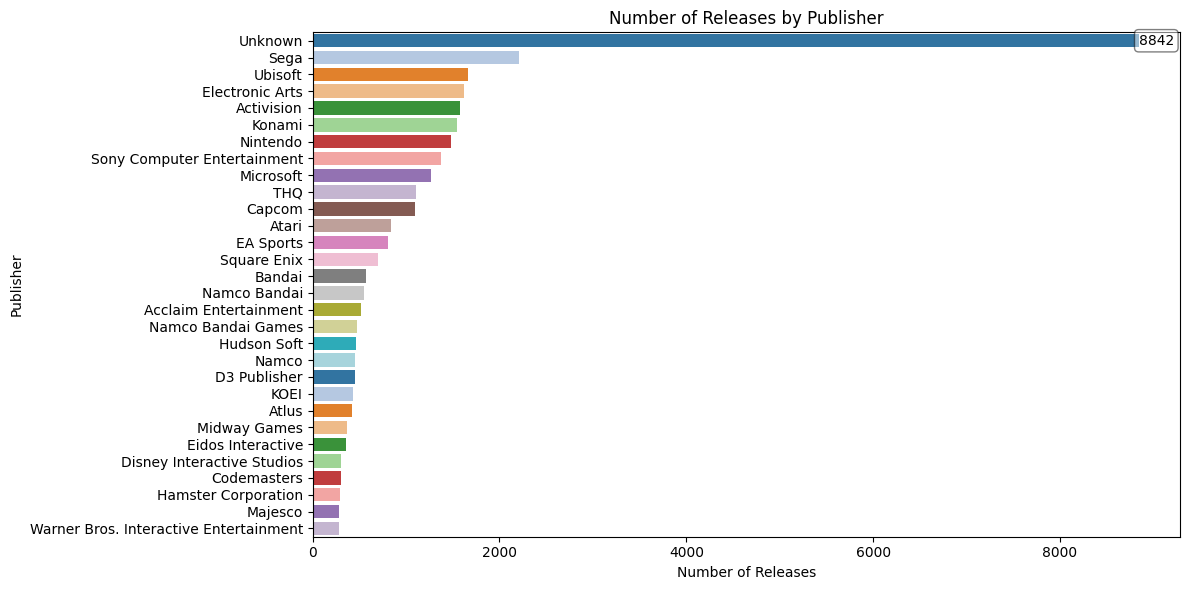

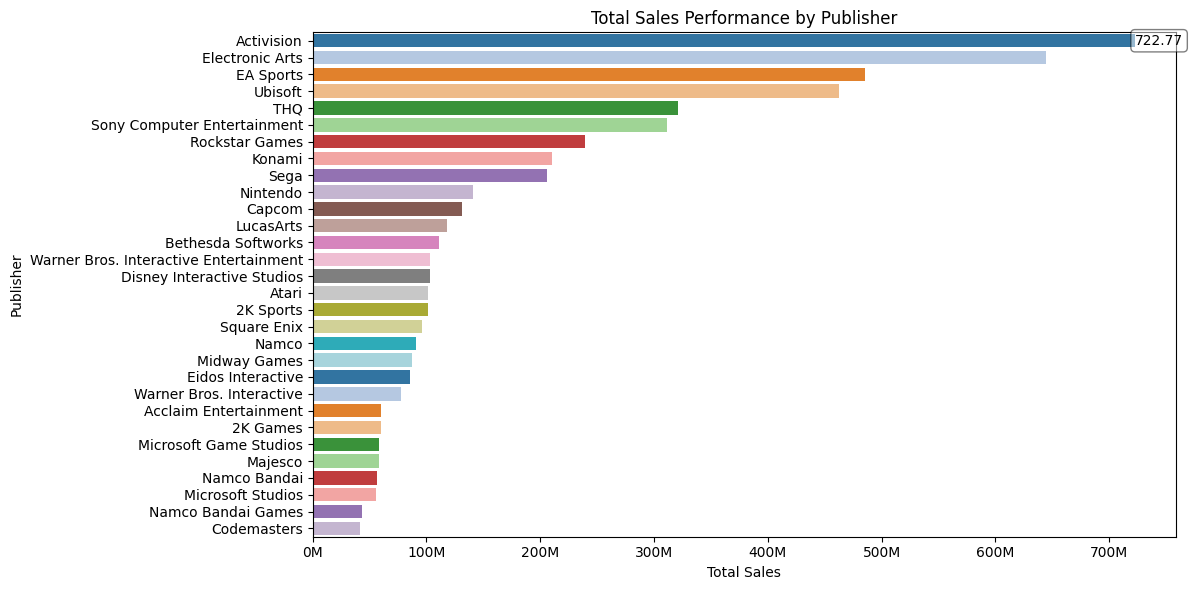

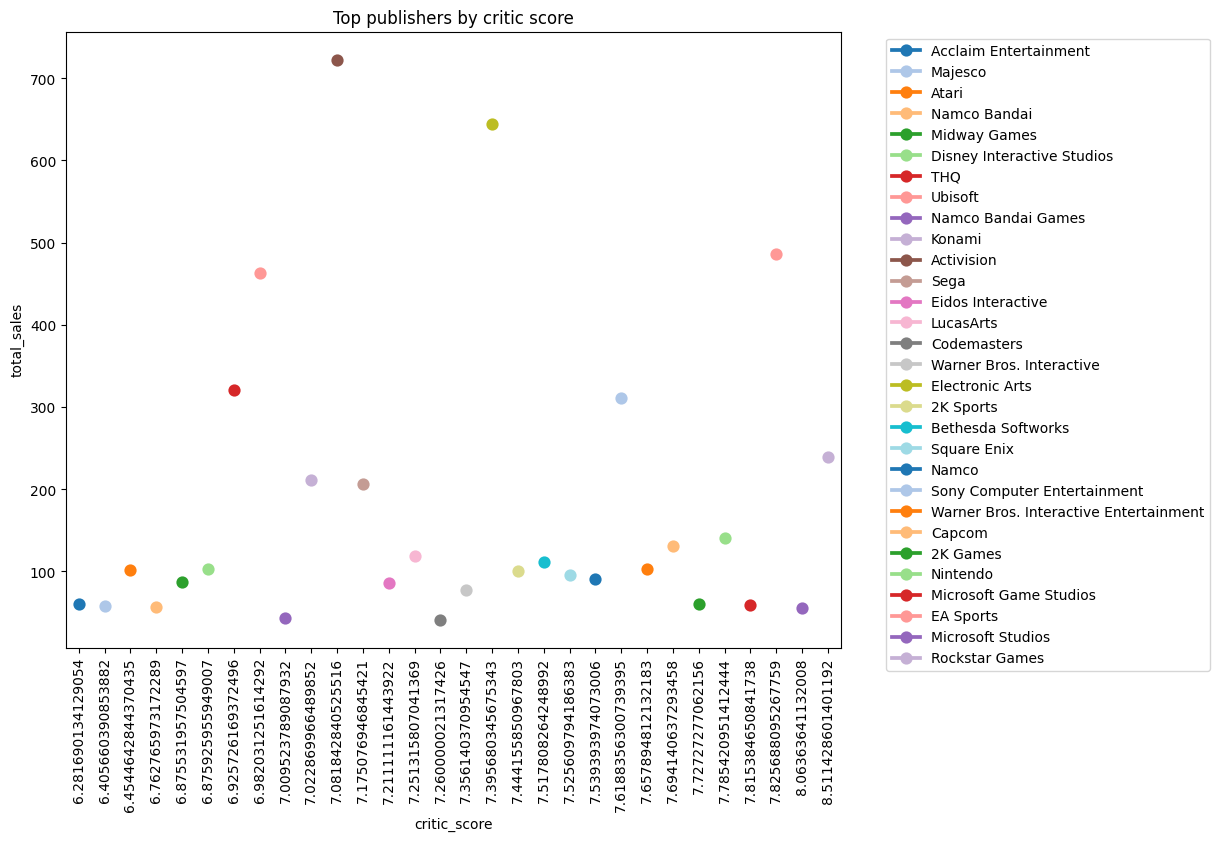

DataFrame[publisher: string, total_sales: double, title: bigint, critic_score: double]

In [2]:
publisher.get_top_sales_performance_by_publisher(df)